# Trabalho Prático 2, Interação e Concorrência

## Grupo 17
### Maria Francisca Fernandes - A72450 
### Leandro Gonçalves - A74564

Consideramos, pelo enunciado, uma lista não ordenada com 8 elementos, sendo que os valores variam entre 0 e 7, já que para qualquer número natural, N, $$N mod 8 = [0, 1, 2, 3, 4, 5, 6, 7]$$

Sendo, então, que os valores da lista variam entre 0 e 7, necessitamos de 3 qubits para os representar.

Para o presente trabalho, queremos localizar um elemento, $s$ em específico, a partir do nosso $N = 17$, sendo que $$ s = N mod 8 $$
$$ s = 17 mod 8 $$
$$ s = 1 $$

Pelo que estudamos anteriormente, pretendemos encontrar $001$, então, pelo algoritmo de *Grover* $$ f(x) = 1, x = 001 $$ $$ f(y) = 0, y ≠ 001 $$

|0|1|0|0|0|0|0|0|
|-|-|-|-|-|-|-|-|
|000|001|010|011|100|101|110|111|

In [1]:
#grupo 17 (17 modulo 8 = 1)

w = 17 % 8
number_bin = bin(w)[2:].zfill(3)
number_qubits = len(number_bin)

print('representação de ', w, ' em binário: ', number_bin)
print('número de qubits: ', number_qubits)

representação de  1  em binário:  001
número de qubits:  3


## 1. Algoritmo de *Grover*

Vamos recorrer ao algoritmo de *Grover* que é constituido por 3 etapas: Inicialização, Oráculo e Amplificação. A primeira etapa, a Inicialização, consiste na aplicação da porta de *Hadamard* em todos os *qubits*. De seguida, o estado que procuramos será marcado pelo oráculo, através da negação da sua amplitude. Já na última etapa, iremos, tal como o nome da etapa indica, amplificar a amplitude do alvo que procuramos.

In [2]:
from qiskit import *
from qiskit.tools.visualization import *

import matplotlib.pyplot as plt
%matplotlib inline

### 1.1. Inicialização

In [3]:
# Começamos por criar um circuito quântico.

qc = QuantumCircuit(number_qubits)

Aplicamos as portas de *Hadamard* aos nossos qubits de forma a criar uma sobreposição quântica uniforme, isto para inicializarmos o sistema com a mesma amplitude em todos os estados possíveis.

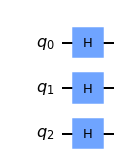

In [4]:
# Aplicar as portas de Hadamard aos 3 $qubits$ inicializados.
for q in range(number_qubits):
    qc.h(q)

qc.draw('mpl')

#qc.barrier()

### 1.2. Oráculo

O Oráculo é o responsável por identificar a solução, no caso do nosso sistema o qubit $|001\rangle$ cuja fase faz uma rotação de $\pi$ radianos, enquanto os outros estados se mantém inalterados. Com isto, a amplitude do estado $|001\rangle$ torna-se negativa, o que significa que a amplitude média foi reduzida.

No nosso caso, sendo que a nossa representação binária é $001$, queremos marcar as posições 1 e 2, mas, também, para além de recorrer à porta de Hadamard, usamos, as portas Pauli-X e Controlled-X.

A porta *Pauli-X* atua num *qubit* singular, sendo o equivalente quântico da porta NOT. Não passa de uma simples rotação no eixo X e torna o *qubit* em $|1\rangle$ se este for $|0\rangle$ e vice-versa, por isto é também denominado de inversão do *qubit*.

A porta *Controlled-X*, ou CNOT, atua em 2 *qubits* e executa uma ação NOT no segundo *qubit*, apenas, quando o primeiro se apresenta como $|1\rangle$.

Definimos, então, o oráculo para marcar o estado $|001\rangle$, da seguinte forma:

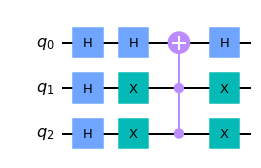

In [5]:
# Definir oráculo para o estado $|001\rangle$

qc.h(0)
qc.x(1)
qc.x(2)
qc.ccx(2,1,0)
qc.h(0)
qc.x(1)
qc.x(2)

qc.draw('mpl')

#qc.barrier()

In [6]:
backend_vector = Aer.get_backend("statevector_simulator")

In [7]:
result = execute(qc, backend_vector).result()
psi = result.get_statevector(qc)

In [8]:
print(psi)

[ 0.35355339-4.32978028e-17j -0.35355339+4.32978028e-17j
  0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j]


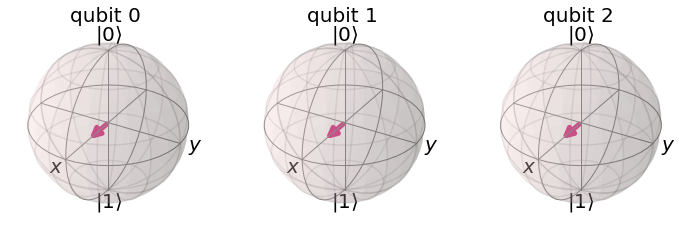

In [9]:
plot_bloch_multivector(psi)

### 1.3. Amplificação

Durante esta etapa do algoritmo, para além de voltar a inverter o qubit $|001\rangle$, também aumenta sua amplitude.

Em relação ao algoritmo de *Grover* e, também, na documentação, esta etapa é identificada como *diffusion transform*.

In [10]:
# Aplicar Hadamard gates aos $qubits$ inicializados.
for q in range(number_qubits):
    qc.h(q)

# Aplicar X gates aos $qubits$ inicializados.
for q in range(number_qubits):
    qc.x(q)

# Aplicar Z gates aos $qubits$ inicializados.
qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

# Aplicar Hadamard & X gates aos $qubits$ inicializados.
for q in range(number_qubits): 
    qc.x(q)
    qc.h(q)

### 1.4. Repetição

De modo a otimizar os resultados obtidos, teremos de repetir os dois passos anteriores. Aplicá-los $\sqrt{N}$  vezes, para sermos exatos, sendo que N é igual ao resultado da função a seguir apresentado.

In [11]:
import math as m

times = round(m.sqrt(2 ** number_qubits))
print("Número de vezes a executar: ", times)

Número de vezes a executar:  3


Pelos resultados das diferentes execuções, percebemos que apesar de, teoricamente, devermos executar todo o processo 3 vezes, o número ótimo de execuções é de 2, ou seja, apenas uma repetição.

Sem repetição, i.e. uma execução do oráculo e amplificação, $0.775$ $$ $$
Uma repetição, i.e. duas execuções do oráculo e amplificação, $>0.930$ $$ $$
Duas repetições, i.e. três execuções do oráculo e amplificação, $0.316$

Da mesma forma, podemos ver a diferença nos estados dos *qubits* a partir dos seus *statevectors*, sendo que todos os vetores estão a indicar quase que um estado $|111\rangle$. 

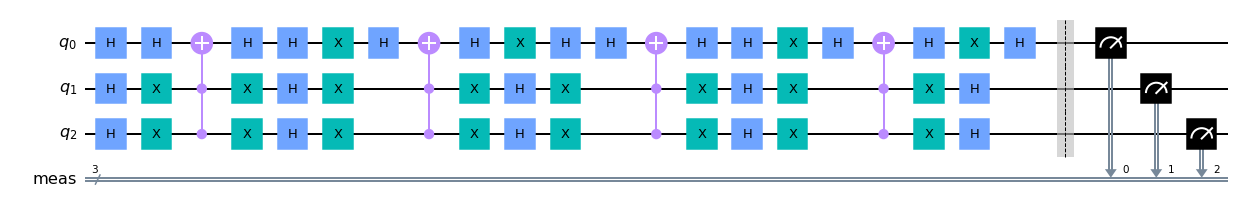

In [12]:
# Repetir passos anteriores (3-1=)2 vezes
qc.h(0)
qc.x(1)
qc.x(2)
qc.ccx(2,1,0)
qc.h(0)
qc.x(1)
qc.x(2)

#qc.barrier()

# Aplicar Hadamard gates aos $qubits$ inicializados.
for q in range(number_qubits): 
    qc.h(q)
    qc.x(q)

# Aplicar porta Z controlada 
qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

# Aplicar portas X e Hadamard aos qubits.
for q in range(number_qubits):
    qc.x(q)
    qc.h(q)
    
# 'Medir' os qubits para aceder aos seus estados $|001\rangle$
qc.measure_all() 
qc.draw(output = 'mpl')

## 2. Simulação de ruído com Aer

Utilizamos os modelos de simulação de ruído do Aer para tentar prever qual será a melhor otimização para o nosso sistema.

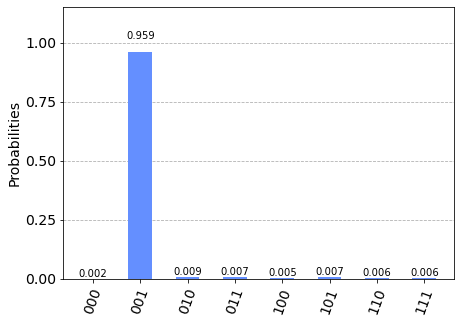

In [13]:
backend = Aer.get_backend('qasm_simulator') 

shots = 1024

# Executa a lista de circuitos quânticos no backend e guarda o resultado
results = execute(qc, backend = backend, shots = shots).result() 

# Obter os dados para o histograma
answer = results.get_counts(qc) 

# Desenhar o histograma
plot_histogram(answer)

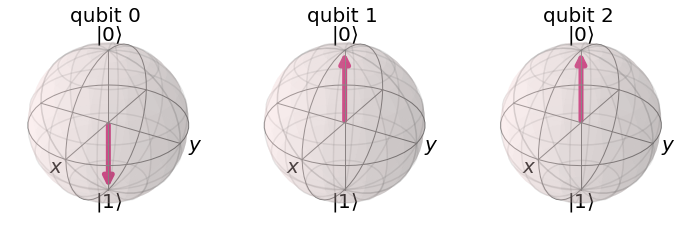

In [14]:
backend_vector = Aer.get_backend("statevector_simulator")

result = execute(qc, backend_vector).result()
psi = result.get_statevector(qc)

plot_bloch_multivector(psi)

Com a ferramenta *statevector* é-nos possível visualizar o estado do sistema, no nosso caso, a representação da nossa solução e oráculo $|001\rangle$.

In [15]:
qc.depth()

22

In [16]:
psi.real

array([ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.])

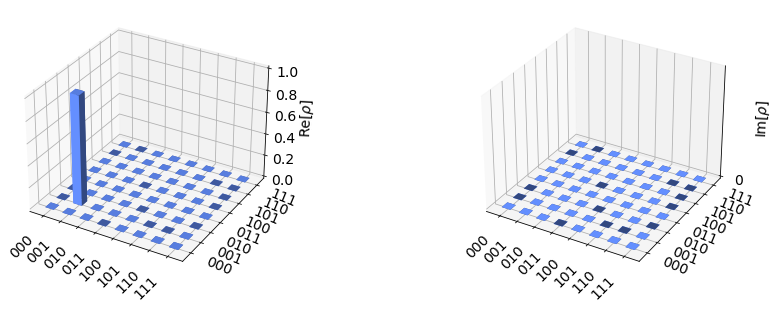

In [17]:
plot_state_city(psi)

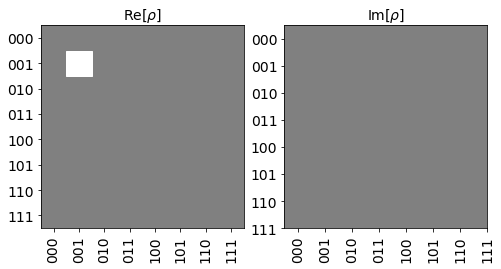

In [18]:
plot_state_hinton(psi)

## 3. IBM

In [19]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [20]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [21]:
from qiskit.tools.monitor import backend_overview, backend_monitor

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 10             Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      151.0          Avg. T1:      75.2           Avg. T1:      79.3
Avg. T2:      67.0           Avg. T2:      73.2           Avg. T2:      91.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 6              Pending Jobs: 4
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operatio

In [22]:
backend_device = provider.get_backend('ibmqx2')
print("Running on: ", backend_device)

Running on:  ibmqx2


In [23]:
backend_monitor(backend_device)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 4
    backend_version: 2.3.6
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    description: 5 qubit device Yorktown
    allow_q_object: True
    sample_name: family: Canary, revision: 1
    max_shots: 8192
    dtm: 0.2222222222222222
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}]]
    qubit_channel_mapping: [['d0', 'u1', 'u4', 'u2', 'u0', 'm0'], ['d1', 'm1', 'u3', 'u2', 'u0', 'u5'], ['u10', 'u4', 'u1', 'u6', 'u3', 'u7', 'u8', 'u5', 'd2', 'm2'], ['m3', 'd3', 'u6', 'u8', 'u9', 'u11'], ['u7', 'u9', 'm4', 'u11', 'u10'

In [24]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [25]:
job_r = execute(qc, backend_device, shots = shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bba7f336b2be1fc324fdc5


In [26]:
# ibmqx2 runs the oracle once
job_get = backend_device.retrieve_job(jobID_r)

job_get.error_message()

result_r = job_get.result()
counts_run = result_r.get_counts(qc)

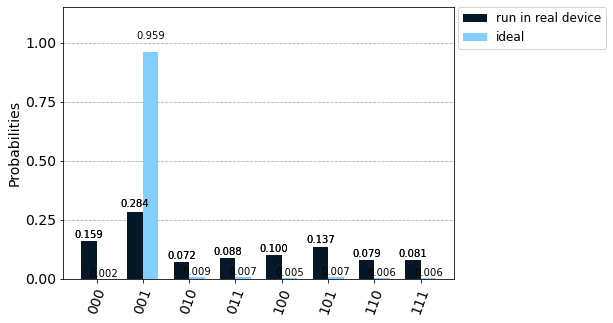

In [27]:
plot_histogram([counts_run, answer], legend=[ 'run in real device', 'ideal'], color=['#061727','#82cfff'])

## 4. IGNIS

Iremos recorrer ao módulo Ignis para o tratamento de erros. 
A sua *framework* permite a caracterização de medição utilizando parâmetros de ruido, interação do dispositivo e erros nas gates de controlo. E ainda que seja feita a mitigação de erros de medição.


Começamos por fazer uso da calibração de medição para mitigar erros de medição

In [28]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

#### Matrizes de Calibração 

Começamos por usar uma matriz de calibração de modo a que seja possível obter uma boa indicação do estado do qubit. Para isso, queremos gerar uma matriz de calibração para os 3 qubits existentes. 

Como temos 3 qubits, são necessários $2^3 = 8$ circuitos de calibração.

Para obtermos a lista de *QuantumCircuit* que contem os circuitos de calibração, usamos a função *complete_means_cal* que usa os parametros qubit_list, qr (registo quântico), cr(registo classico) e ciclabel (string adicionada ao inicio do nome em circuitos para a sua identificação).

In [29]:
# Geração dos circuitos de calibração
qr = QuantumRegister(number_qubits)

# meas_calibs:
# lista de dos objetos do circuito quântico que contêm os circuitos de calibração
# state_labels:
# estados de calibração
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [30]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

#### Computação da matriz de calibração

Caso não seja aplicado qualquer ruído, a matriz de calibração expectável será a matriz identidade 8x8. Como a matriz foi computada com recurso a um dispositivo quântico, existirá ruido no circuito.

Executando o circuito de calibração.

In [31]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bba8295f4eaadc00daecb9


In [32]:
job_get=backend_device.retrieve_job(jobID_run_ignis)
cal_results = job_get.result()

Após a execução, é calculada a matriz de calibração

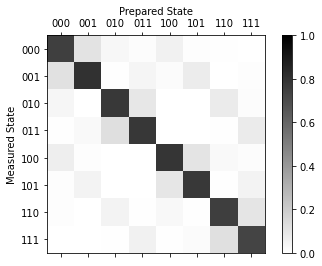

In [33]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Gráfico da matriz de calibração
meas_fitter.plot_calibration()

#### Análise de Resultados

Para ser possível analisar os resultados, é calculada a fidelidade da medição efetuada anteriormente. São os elementos da diagonal da matriz que devolvem as probabilidade de medir um estado dada a sua preparação. Assim o traço obtido é a fidelidade média.

In [34]:
#Qual é a fidelidade da medição?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.771118


#### Aplicação da calibração 


Para calcular o resultados com e sem a mitigação de erros, vamos aplicar a matriz de calibração. 

Os nossos dados brutos serão **result_r**. Pode ainda ser aplicado um filtro baseado na matriz de calibração de modo auq se obtenham contagens mitigadas.

In [35]:
# Objeto do filtro
meas_filter = meas_fitter.filter

# Resultados com mitigação
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

Gráfico com resultados com e sem mitigação:

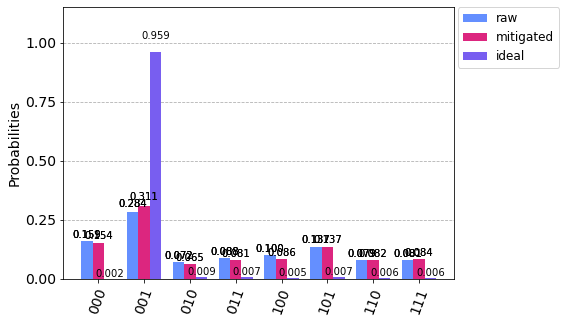

In [36]:
plot_histogram([counts_run, mitigated_counts, answer], legend=['raw', 'mitigated', 'ideal'])

Por fim, acrescentamos apenas a informação relativamente ao software utilizado.

In [37]:
%qiskit_version_table